# Sign Language Recognition
It uses deep learnig model 

In [2]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import itertools
import os
import matplotlib.pyplot as plt
%matplotlib inline

### Get path

In [4]:
train_path='C:/Users/abhin/sign lang proj/images/test'
test_path='C:/Users/abhin/sign lang proj/images/train'

#### Size of image

In [5]:
sze=128  #size of image (128*128)

### Take images in form of batches from data Generator

In [6]:
train_datagen= ImageDataGenerator( rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_batches = train_datagen.flow_from_directory(directory=train_path,
                                               batch_size=10, # number of images to process at a time 
                                               target_size=(sze, sze), # convert all images to be 128 x 128
                                               class_mode="categorical", #classification problem (27 classes)
                                               color_mode="grayscale")
test_batches = test_datagen.flow_from_directory(directory=test_path,
                                                batch_size=10,
                                                target_size=(sze,sze),
                                                class_mode="categorical",
                                                color_mode="grayscale")  

Found 4268 images belonging to 27 classes.
Found 12845 images belonging to 27 classes.


### Plot some images

In [7]:
imgs, labels = next(train_batches)

In [8]:
# plots images with labels within jupyter notebook
def plotImages(images_arr):
    fig,axes=plt.subplots(1,10,figsize=(20,20))
    axes=axes.flatten()
    for img, ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

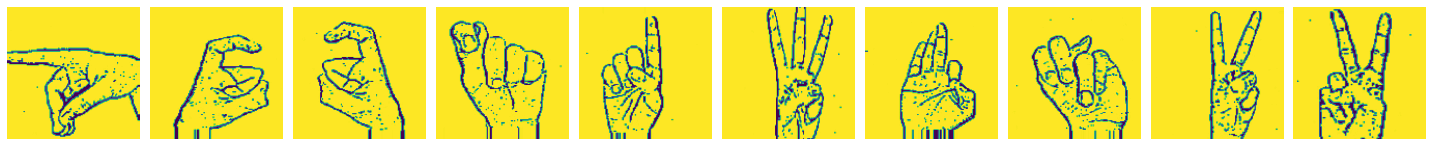

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0.]]


In [9]:
plotImages(imgs)
print(labels)

### Build the sequential model

In [10]:
model=Sequential([
                  Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',input_shape=(sze,sze,1)),
                  MaxPool2D(pool_size=(2,2)),
                  Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
                  MaxPool2D(pool_size=(2,2)),
                  Flatten(),
                  Dense(units=256,activation='relu'),
                  Dense(units=128,activation='relu'),
                  Dense(units=96,activation='relu'),
                  Dense(units=64,activation='relu'),
                  Dense(units=27,activation='softmax')              
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               16777472  
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3

### Train the model

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(x=train_batches,validation_data=test_batches,epochs=15,verbose=2)

Epoch 1/15
427/427 - 184s - loss: 2.6259 - accuracy: 0.2627 - val_loss: 1.1338 - val_accuracy: 0.6585
Epoch 2/15
427/427 - 177s - loss: 0.9209 - accuracy: 0.7224 - val_loss: 0.4774 - val_accuracy: 0.8334
Epoch 3/15
427/427 - 174s - loss: 0.5056 - accuracy: 0.8442 - val_loss: 0.2103 - val_accuracy: 0.9327
Epoch 4/15
427/427 - 173s - loss: 0.3598 - accuracy: 0.8843 - val_loss: 0.1259 - val_accuracy: 0.9601
Epoch 5/15
427/427 - 172s - loss: 0.2631 - accuracy: 0.9164 - val_loss: 0.1568 - val_accuracy: 0.9467
Epoch 6/15
427/427 - 174s - loss: 0.2036 - accuracy: 0.9316 - val_loss: 0.1225 - val_accuracy: 0.9629
Epoch 7/15
427/427 - 169s - loss: 0.1827 - accuracy: 0.9330 - val_loss: 0.0713 - val_accuracy: 0.9793
Epoch 8/15
427/427 - 174s - loss: 0.1428 - accuracy: 0.9567 - val_loss: 0.1658 - val_accuracy: 0.9404
Epoch 9/15
427/427 - 184s - loss: 0.1092 - accuracy: 0.9698 - val_loss: 0.0360 - val_accuracy: 0.9908
Epoch 10/15
427/427 - 185s - loss: 0.0966 - accuracy: 0.9709 - val_loss: 0.0961 - 

### Save the model

In [14]:
#checks first to see if file exists already
#if not, the model is saved 
import os.path
if(os.path.isfile('C:/Users/abhin/sign lang proj/sign_lang_recog_train_model2.h5')) is False:
    model.save('C:/Users/abhin/sign lang proj/sign_lang_recog_train_model.h5')

### Use the saved model

In [14]:
from tensorflow.keras.models import load_model
new_model=load_model('C:/Users/abhin/sign lang proj/sign_lang_recog_train_model.h5')

In [15]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4194432   
_________________________________________________________________
dense_1 (Dense)              (None, 96)                1

### model.to_json
save the architecture of a model, and not its weights or its training configuration

In [16]:
#save as json
json_string=model.to_json()

In [17]:
# model reconstruction from JSON:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [19]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4194432   
_________________________________________________________________
dense_1 (Dense)              (None, 96)                1

### model.save_weights
save the weights of a model

In [ ]:
 #checks first to see if file exists already
#if not, the model is saved 
import os.path
if(os.path.isfile(('my_model_weights.h5')) is False:
    model.save_weights('my_model_weights.h5')